In [1]:
import pandas as pd

# Load data
df = pd.read_csv('./owid-covid-data.csv')

# Explore
print(df.columns)  # View column names
print(df.head())  # Preview first 5 rows
print(df.isnull().sum())  # Check missing values

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# First, define original_df (assuming you want to use a pandas DataFrame)
import pandas as pd

# Create a sample DataFrame (replace this with your actual data source)
original_df = pd.DataFrame({
    'date': ['2023-01-01', '2023-01-02', None, '2023-01-04'],
    'total_cases': [100, 120, None, 150]
})

# Define your filtering conditions (replace with your actual conditions)
your_conditions = original_df['total_cases'].notna() | original_df['date'].notna()

# Create an explicit copy first
df_cleaned = original_df[your_conditions].copy()

# Now modifications work without warnings
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['total_cases'].fillna(df_cleaned['total_cases'].median(), inplace=True)
df_cleaned['total_cases'].interpolate(inplace=True)

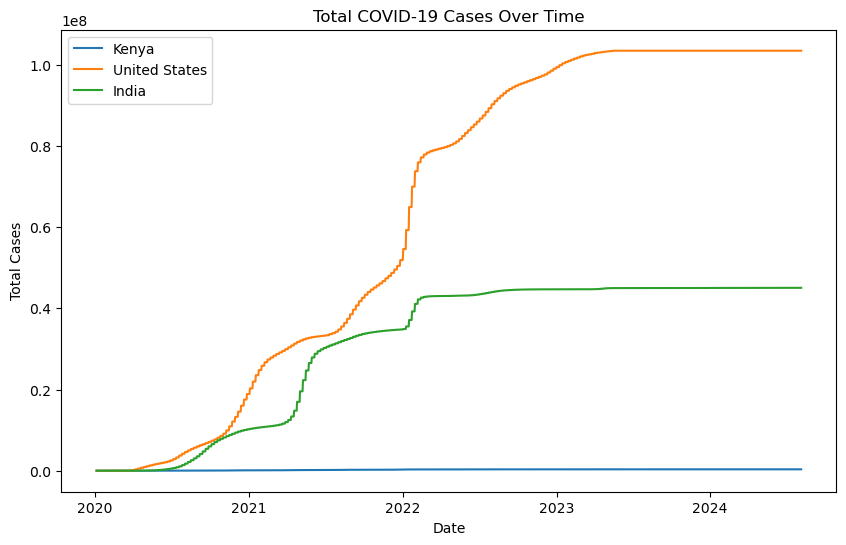

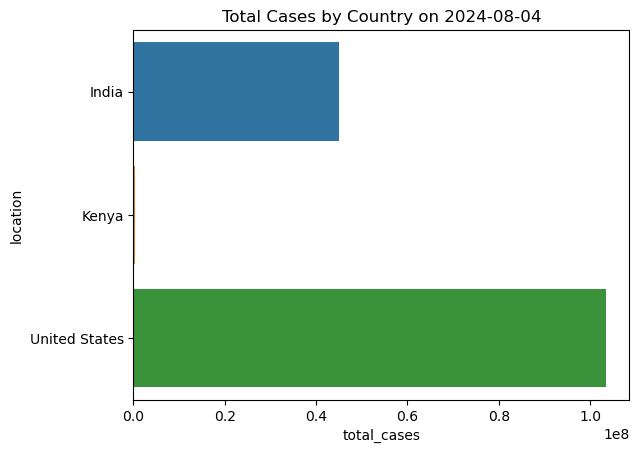

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Bar chart: Total cases by country (latest date)
latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]
sns.barplot(x='total_cases', y='location', data=latest_data)
plt.title(f'Total Cases by Country on {latest_date.date()}')
plt.show()

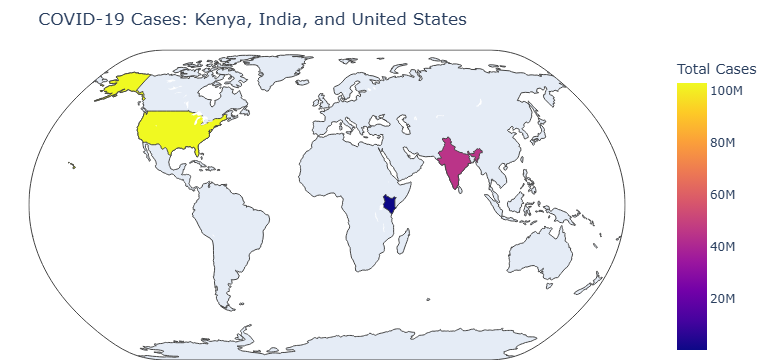

In [ ]:
import plotly.express as px
import pandas as pd

# Create a sample dataset if you don't have one
# In a real scenario, you would load your actual COVID data
# This is just for demonstration purposes
data = {
    'iso_code': ['KEN', 'IND', 'USA'],
    'location': ['Kenya', 'India', 'United States'],
    'total_cases': [342000, 44900000, 103000000]  # Example case numbers
}

df = pd.DataFrame(data)

# Plot choropleth focusing only on the three countries
fig = px.choropleth(
    df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='COVID-19 Cases: Kenya, India, and United States',
    projection='natural earth'  # Use a more natural-looking projection
)

# Improve the layout
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Total Cases"
    )
)

fig.show()